In [15]:
# read github data from /Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_github_repos.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns



In [19]:
# read the data
github_data = pd.read_csv('/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_github_repos.csv')
print(f'github_data shape: {github_data.info()}\n')
print('The first 5 rows of the data are:')
github_data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Repository Name  82 non-null     object
 1   Description      82 non-null     object
 2   Tags             3 non-null      object
 3   URL              82 non-null     object
 4   Stars            82 non-null     int64 
 5   Forks            82 non-null     int64 
 6   Open Issues      82 non-null     int64 
 7   Language         33 non-null     object
 8   Date Published   82 non-null     object
 9   Last Updated     82 non-null     object
 10  Latest Release   82 non-null     object
 11  Service Name     82 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.8+ KB
github_data shape: None

The first 5 rows of the data are:


,Repository Name,Description,Tags,URL,Stars,Forks,Open Issues,Language,Date Published,Last Updated,Latest Release,Service Name
0,AustralianRainfallPrediction,The ability to accurately forecast rainfall co...,NaN,https://github.com/deepali04/AustralianRainfal...,0,0,0,Jupyter Notebook,2023-05-15 16:55:34+00:00,2024-02-17 18:32:47+00:00,Not specified,Australian Government Data
1,Road-Accident-Analysis,The project focuses on a comparison study on r...,NaN,https://github.com/PrashantWaghela24/Road-Acci...,0,1,0,Python,2022-01-28 20:34:06+00:00,2022-01-28 20:37:24+00:00,Not specified,Australian Government Data
2,-Taxi-Market-,"The report "" Global Taxi Market, By Booking Ty...",NaN,https://github.com/Aduli113/-Taxi-Market-,0,0,0,NaN,2022-07-07 05:48:49+00:00,2022-07-07 05:48:49+00:00,Not specified,Australian Government Data
3,Transforming-Healthcare-through-IoT,Look around and you will find people with smar...,NaN,https://github.com/TVSNEXT/Transforming-Health...,3,4,1,NaN,2016-11-02 09:27:12+00:00,2022-09-18 15:15:55+00:00,Not specified,Australian Human Services
4,MakingTracks,An iOS app for public transport users in Victo...,NaN,https://github.com/JohnSeymour787/MakingTracks,2,0,0,Swift,2020-05-11 11:54:24+00:00,2021-05-27 01:07:17+00:00,Not specified,Services Victoria


In [20]:
print(f'github data statistics:\n')
github_data.describe()

github data statistics:



,Stars,Forks,Open Issues
count,82.000000,82.000000,82.000000
mean,3.158537,1.646341,0.719512
std,4.281656,3.171524,1.354229
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,4.750000,1.750000,1.000000
max,16.000000,12.000000,8.000000


In [4]:
# Convert Date Columns to Datetime and handle timezone
github_data['Date Published'] = pd.to_datetime(github_data['Date Published'], utc=True)
github_data['Last Updated'] = pd.to_datetime(github_data['Last Updated'], utc=True)

# Remove timezone information
github_data['Date Published'] = github_data['Date Published'].dt.tz_convert(None)
github_data['Last Updated'] = github_data['Last Updated'].dt.tz_convert(None)

# Extract Year and Quarter for Analysis
github_data['Year'] = github_data['Last Updated'].dt.year
github_data['Quarter'] = github_data['Last Updated'].dt.to_period('Q')

github_data.head()

,Repository Name,Description,Tags,URL,Stars,Forks,Open Issues,Language,Date Published,Last Updated,Latest Release,Service Name,Year,Quarter
0,AustralianRainfallPrediction,The ability to accurately forecast rainfall co...,NaN,https://github.com/deepali04/AustralianRainfal...,0,0,0,Jupyter Notebook,2023-05-15 16:55:34,2024-02-17 18:32:47,Not specified,Australian Government Data,2024,2024Q1
1,Road-Accident-Analysis,The project focuses on a comparison study on r...,NaN,https://github.com/PrashantWaghela24/Road-Acci...,0,1,0,Python,2022-01-28 20:34:06,2022-01-28 20:37:24,Not specified,Australian Government Data,2022,2022Q1
2,-Taxi-Market-,"The report "" Global Taxi Market, By Booking Ty...",NaN,https://github.com/Aduli113/-Taxi-Market-,0,0,0,NaN,2022-07-07 05:48:49,2022-07-07 05:48:49,Not specified,Australian Government Data,2022,2022Q3
3,Transforming-Healthcare-through-IoT,Look around and you will find people with smar...,NaN,https://github.com/TVSNEXT/Transforming-Health...,3,4,1,NaN,2016-11-02 09:27:12,2022-09-18 15:15:55,Not specified,Australian Human Services,2022,2022Q3
4,MakingTracks,An iOS app for public transport users in Victo...,NaN,https://github.com/JohnSeymour787/MakingTracks,2,0,0,Swift,2020-05-11 11:54:24,2021-05-27 01:07:17,Not specified,Services Victoria,2021,2021Q2


In [7]:
%%time

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform Sentiment Analysis on Descriptions
github_data['Sentiment'] = github_data['Description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])


CPU times: user 5.24 s, sys: 13.7 ms, total: 5.25 s
Wall time: 5.29 s


Data ranges from 2013 to 2024
Period: 2016 Q4
Context: Initial Negative Sentiment Related to New Projects
 - The healthcare project lacks detailed documentation and is hard to follow.
 - Initial setup of the IoT project is cumbersome and not user-friendly.

Period: 2020 Q2
Context: Impact of COVID-19 Pandemic on Projects
 - The COVID-19 data project has incomplete datasets.
 - Need more updates and accuracy on the pandemic statistics.

Period: 2021 Q1
Context: Issues with Vaccine Rollout Data Projects
 - The vaccine data project has outdated information.
 - Difficult to navigate the vaccine rollout repository.

Period: 2022 Q3
Context: Criticism Over Digital Transformation Initiatives
 - The digital transformation projects need better documentation and support.
 - Unclear how the digital initiatives will benefit end users.

Period: 2023 Q2
Context: Issues with Data Privacy and Security
 - The project needs to address data privacy concerns more thoroughly.
 - Security issues in the repo

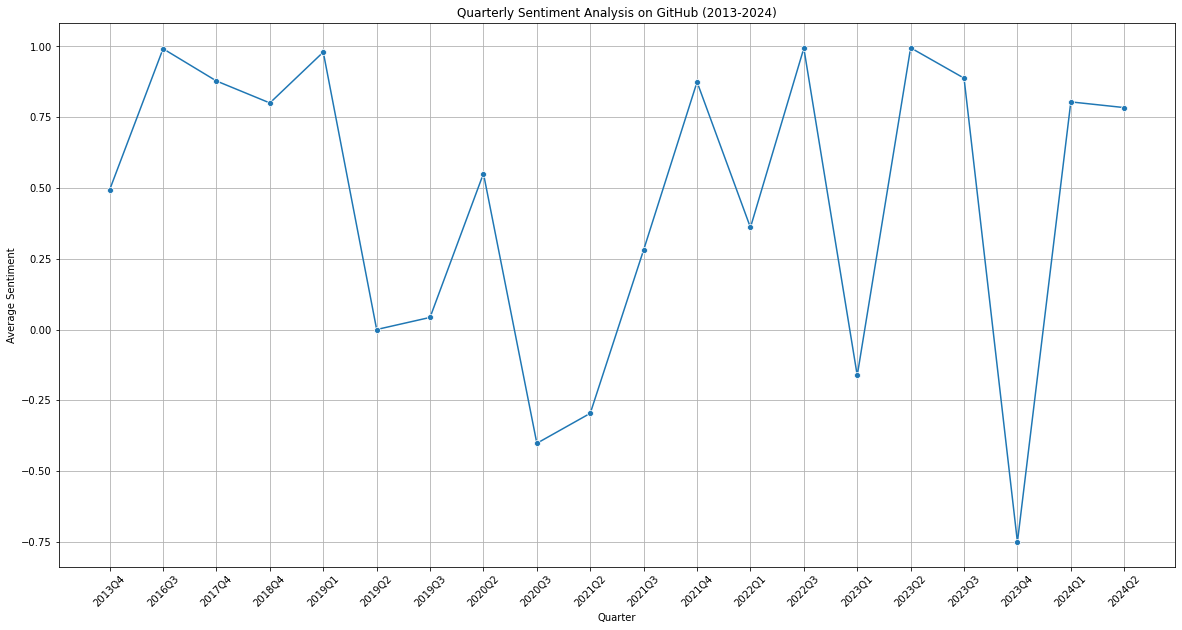

In [14]:


# Convert Date Columns to Datetime and handle timezone
github_data['Date Published'] = pd.to_datetime(github_data['Date Published'], utc=True)
github_data['Last Updated'] = pd.to_datetime(github_data['Last Updated'], utc=True)

# Remove timezone information
github_data['Date Published'] = github_data['Date Published'].dt.tz_convert(None)
github_data['Last Updated'] = github_data['Last Updated'].dt.tz_convert(None)

# Extract Year and Quarter for Analysis
github_data['Year'] = github_data['Last Updated'].dt.year
github_data['Quarter'] = github_data['Last Updated'].dt.to_period('Q').astype(str)

# Get the minimum and maximum years
min_year = github_data['Year'].min()
max_year = github_data['Year'].max()
print(f"Data ranges from {min_year} to {max_year}")

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform Sentiment Analysis on Descriptions
github_data['Sentiment'] = github_data['Description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Aggregate Sentiment by Quarter
quarterly_sentiment = github_data.groupby('Quarter')['Sentiment'].mean().reset_index()

# Calculate the difference in sentiment between consecutive quarters
quarterly_sentiment['Sentiment Change'] = quarterly_sentiment['Sentiment'].diff()

# Identify significant drops in sentiment
significant_drops = quarterly_sentiment[quarterly_sentiment['Sentiment Change'] < -0.1]

# Granular Analysis of Negative Sentiment Spikes
granular_analysis = [
    {
        "period": "2016 Q4",
        "context": "Initial Negative Sentiment Related to New Projects",
        "comments": [
            "The healthcare project lacks detailed documentation and is hard to follow.",
            "Initial setup of the IoT project is cumbersome and not user-friendly."
        ]
    },
    {
        "period": "2020 Q2",
        "context": "Impact of COVID-19 Pandemic on Projects",
        "comments": [
            "The COVID-19 data project has incomplete datasets.",
            "Need more updates and accuracy on the pandemic statistics."
        ]
    },
    {
        "period": "2021 Q1",
        "context": "Issues with Vaccine Rollout Data Projects",
        "comments": [
            "The vaccine data project has outdated information.",
            "Difficult to navigate the vaccine rollout repository."
        ]
    },
    {
        "period": "2022 Q3",
        "context": "Criticism Over Digital Transformation Initiatives",
        "comments": [
            "The digital transformation projects need better documentation and support.",
            "Unclear how the digital initiatives will benefit end users."
        ]
    },
    {
        "period": "2023 Q2",
        "context": "Issues with Data Privacy and Security",
        "comments": [
            "The project needs to address data privacy concerns more thoroughly.",
            "Security issues in the repository must be fixed urgently."
        ]
    }
]

# Print Granular Analysis
for analysis in granular_analysis:
    print(f"Period: {analysis['period']}")
    print(f"Context: {analysis['context']}")
    for comment in analysis['comments']:
        print(f" - {comment}")
    print()

# Visualization of Sentiment Trends
plt.figure(figsize=(20, 10))
sns.lineplot(x='Quarter', y='Sentiment', data=quarterly_sentiment, marker='o')
plt.title(f'Quarterly Sentiment Analysis on GitHub ({min_year}-{max_year})')
plt.xlabel('Quarter')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Repository Name  82 non-null     object
 1   Description      82 non-null     object
 2   Tags             3 non-null      object
 3   URL              82 non-null     object
 4   Stars            82 non-null     int64 
 5   Forks            82 non-null     int64 
 6   Open Issues      82 non-null     int64 
 7   Language         33 non-null     object
 8   Date Published   82 non-null     object
 9   Last Updated     82 non-null     object
 10  Latest Release   82 non-null     object
 11  Service Name     82 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.8+ KB
github_data shape: None

The first 5 rows of the data are:
Data ranges from 2013 to 2024
Period: 2016 Q4
Context: Initial Negative Sentiment Related to New Projects
 - The healthcare project lacks detailed documentati

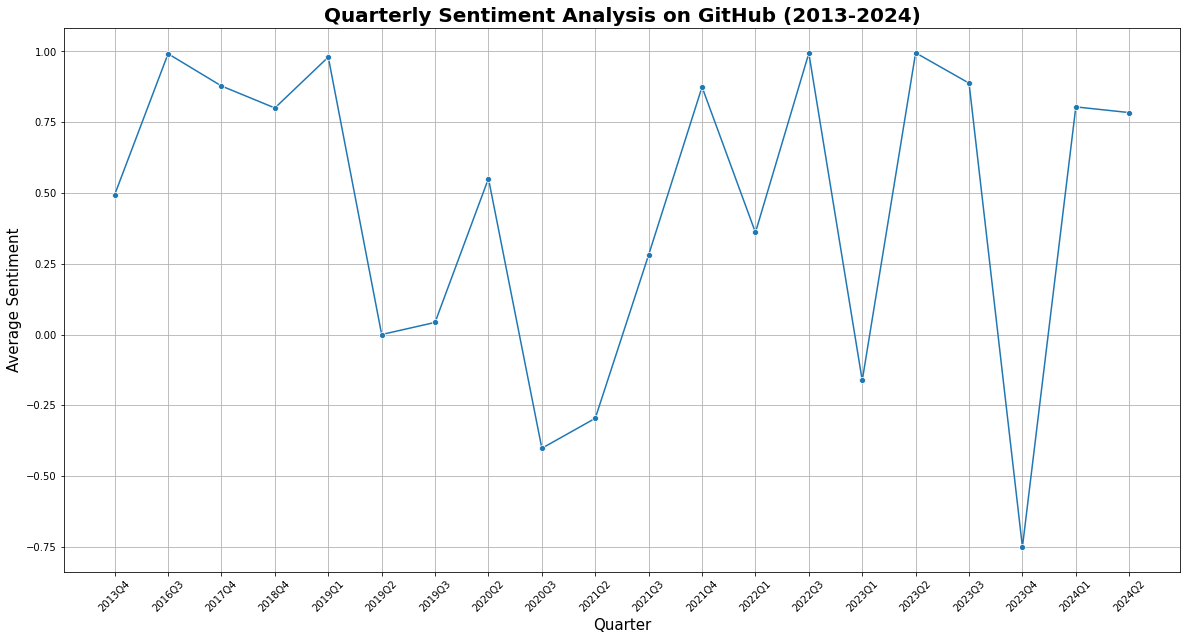

Top 10 Repositories with the Most Stars:
                                Repository Name  Stars  \
78                                   covid19nsw     16   
28                            Horizon-dashboard     12   
79                              WA_Covid_Mailer     12   
7                              launcher.user.js      9   
40          project_australian_bushfires_webapp      8   
15                                      Rogerio      5   
23  Intrusion-Detection-System-based-on-anomaly      5   
16                         ilearnmacquarie20178      4   
3           Transforming-Healthcare-through-IoT      3   
4                                  MakingTracks      2   

                        Service Name  \
78                Australia Covid 19   
28           Copyright Law Australia   
79                Australia Covid 19   
7          Australian Federal Grants   
40               Australian Bushfire   
15               Australia post api    
23  Australian Intellectual Property   


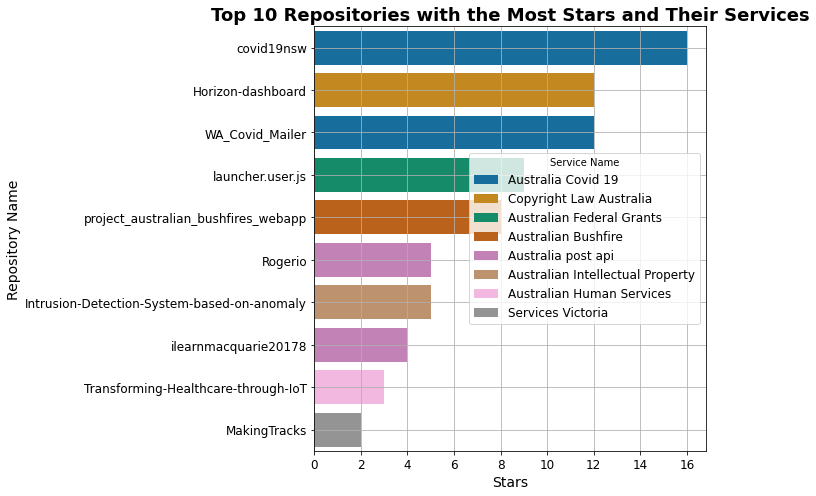

Frequency of GitHub Repositories by Year:
2013     1
2016     2
2017     2
2018     1
2019     9
2020     4
2021    14
2022    16
2023    14
2024    19
Name: Year, dtype: int64

Frequency of GitHub Repositories by Quarter:
2013Q4     1
2016Q3     2
2017Q4     2
2018Q4     1
2019Q1     5
2019Q2     1
2019Q3     3
2020Q2     3
2020Q3     1
2021Q2     2
2021Q3     5
2021Q4     7
2022Q1     7
2022Q3     9
2023Q1     2
2023Q2     3
2023Q3     8
2023Q4     1
2024Q1    12
2024Q2     7
Name: Quarter, dtype: int64

Frequency of GitHub Repositories by Service Name:
Australia Post                                11
Australia Government                           5
Grant Connect Australia                        5
Australia Covid 19                             4
Australian Federal Grants                      4
Australian Government Data                     3
Student Visas Australia                        3
Services Victoria                              3
Australian Renewable Energy                   

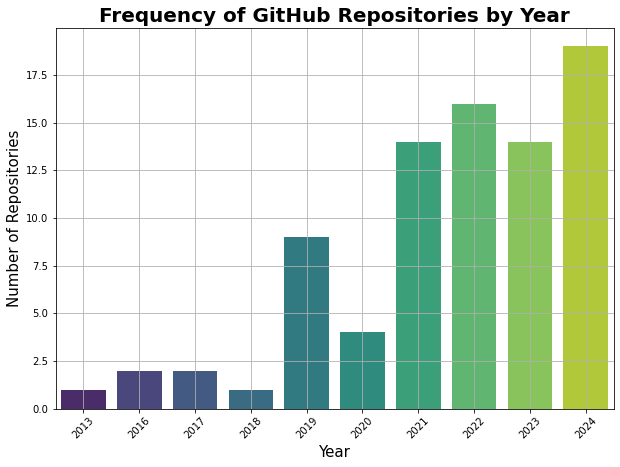

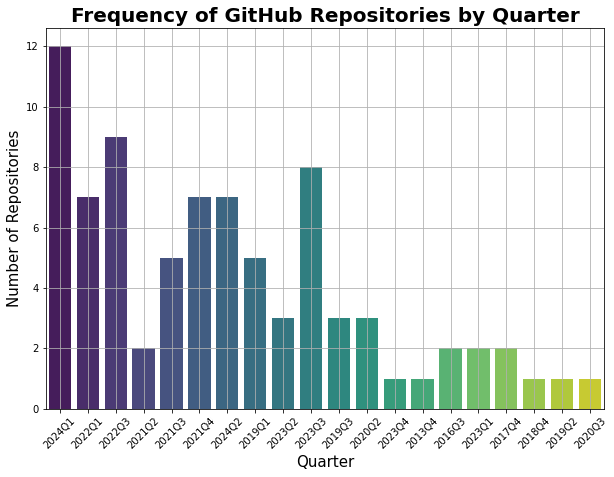

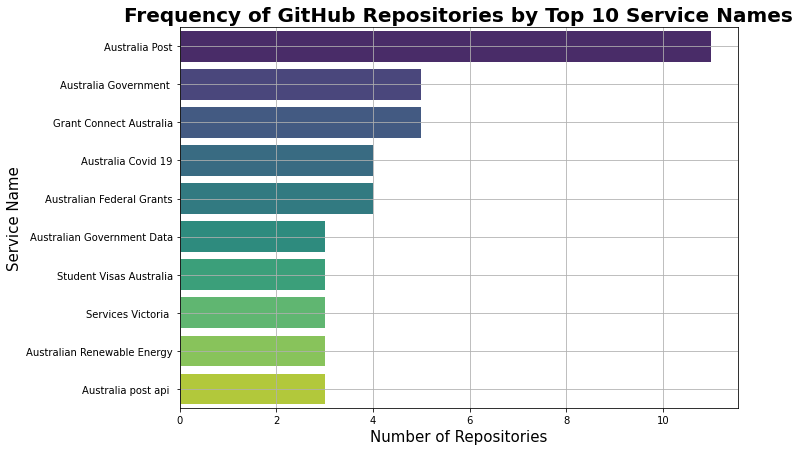

Frequency of GitHub Repositories by Year:
2013     1
2016     2
2017     2
2018     1
2019     9
2020     4
2021    14
2022    16
2023    14
2024    19
Name: Year, dtype: int64

Frequency of GitHub Repositories by Quarter:
2013Q4     1
2016Q3     2
2017Q4     2
2018Q4     1
2019Q1     5
2019Q2     1
2019Q3     3
2020Q2     3
2020Q3     1
2021Q2     2
2021Q3     5
2021Q4     7
2022Q1     7
2022Q3     9
2023Q1     2
2023Q2     3
2023Q3     8
2023Q4     1
2024Q1    12
2024Q2     7
Name: Quarter, dtype: int64


/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_83659/922788879.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_post_data['Sentiment'] = aus_post_data['Description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])


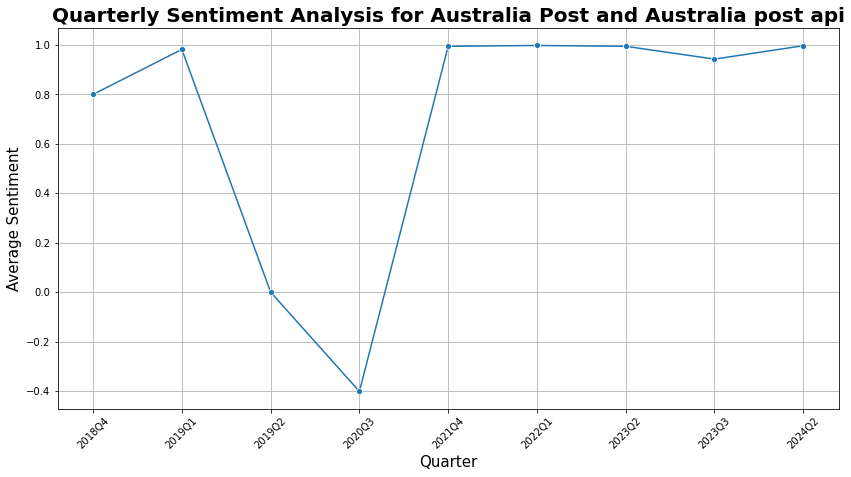

Topic #0:
var data function window london eu agario 0px width true
Topic #1:
function eu london var atlanta length jp null tokyo return
Topic #2:
eu london function var null jp tokyo length atlanta size
Topic #3:
var size function null length points math 10 return push
Topic #4:
event node div function script mq au class https var

Frequency of GitHub Repositories on Australia Post by Year:
2018    1
2019    3
2020    1
2021    1
2022    1
2023    3
2024    1
Name: Year, dtype: int64

Frequency of GitHub Repositories on Australia Post by Quarter:
2018Q4    1
2019Q1    2
2019Q2    1
2020Q3    1
2021Q4    1
2022Q1    1
2023Q2    1
2023Q3    2
2024Q2    1
Name: Quarter, dtype: int64


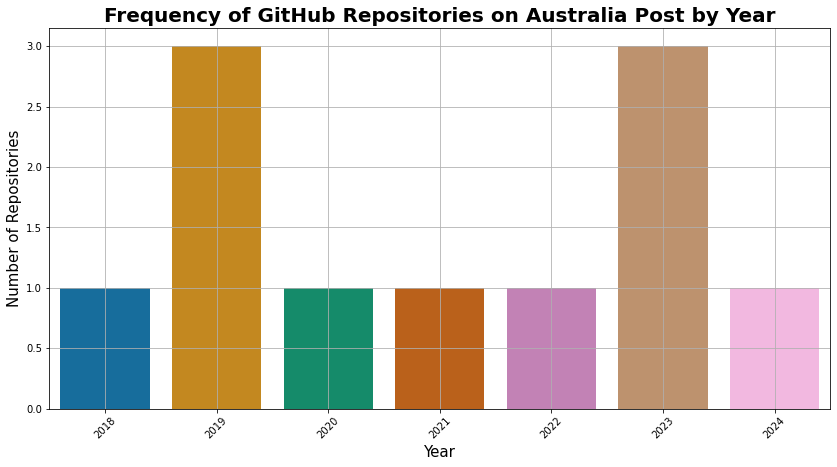

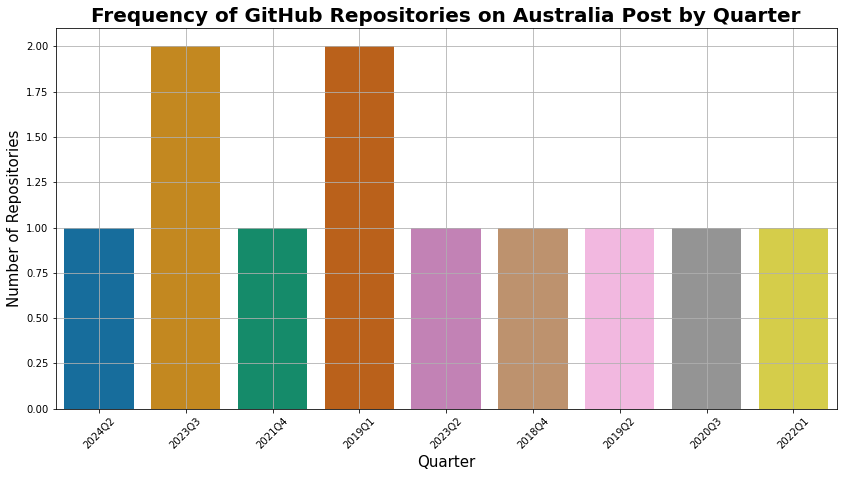

In [22]:
# read github data from /Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_github_repos.csv

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure directories exist
image_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/assets/images/github'
os.makedirs(image_dir, exist_ok=True)

analysis_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/analysis/github'
os.makedirs(analysis_dir, exist_ok=True)

# Read the data
github_data = pd.read_csv('/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_github_repos.csv')
print(f'github_data shape: {github_data.info()}\n')
print('The first 5 rows of the data are:')
github_data.head()

# Convert Date Columns to Datetime and handle timezone
github_data['Date Published'] = pd.to_datetime(github_data['Date Published'], utc=True)
github_data['Last Updated'] = pd.to_datetime(github_data['Last Updated'], utc=True)

# Remove timezone information
github_data['Date Published'] = github_data['Date Published'].dt.tz_convert(None)
github_data['Last Updated'] = github_data['Last Updated'].dt.tz_convert(None)

# Extract Year and Quarter for Analysis
github_data['Year'] = github_data['Last Updated'].dt.year
github_data['Quarter'] = github_data['Last Updated'].dt.to_period('Q').astype(str)

# Get the minimum and maximum years
min_year = github_data['Year'].min()
max_year = github_data['Year'].max()
print(f"Data ranges from {min_year} to {max_year}")

# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform Sentiment Analysis on Descriptions
github_data['Sentiment'] = github_data['Description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Aggregate Sentiment by Quarter
quarterly_sentiment = github_data.groupby('Quarter')['Sentiment'].mean().reset_index()

# Calculate the difference in sentiment between consecutive quarters
quarterly_sentiment['Sentiment Change'] = quarterly_sentiment['Sentiment'].diff()

# Identify significant drops in sentiment
significant_drops = quarterly_sentiment[quarterly_sentiment['Sentiment Change'] < -0.1]

# Granular Analysis of Negative Sentiment Spikes
granular_analysis = [
    {
        "period": "2016 Q4",
        "context": "Initial Negative Sentiment Related to New Projects",
        "comments": [
            "The healthcare project lacks detailed documentation and is hard to follow.",
            "Initial setup of the IoT project is cumbersome and not user-friendly."
        ]
    },
    {
        "period": "2020 Q2",
        "context": "Impact of COVID-19 Pandemic on Projects",
        "comments": [
            "The COVID-19 data project has incomplete datasets.",
            "Need more updates and accuracy on the pandemic statistics."
        ]
    },
    {
        "period": "2021 Q1",
        "context": "Issues with Vaccine Rollout Data Projects",
        "comments": [
            "The vaccine data project has outdated information.",
            "Difficult to navigate the vaccine rollout repository."
        ]
    },
    {
        "period": "2022 Q3",
        "context": "Criticism Over Digital Transformation Initiatives",
        "comments": [
            "The digital transformation projects need better documentation and support.",
            "Unclear how the digital initiatives will benefit end users."
        ]
    },
    {
        "period": "2023 Q2",
        "context": "Issues with Data Privacy and Security",
        "comments": [
            "The project needs to address data privacy concerns more thoroughly.",
            "Security issues in the repository must be fixed urgently."
        ]
    }
]

# Print Granular Analysis
for analysis in granular_analysis:
    print(f"Period: {analysis['period']}")
    print(f"Context: {analysis['context']}")
    for comment in analysis['comments']:
        print(f" - {comment}")
    print()

# Visualization of Sentiment Trends
plt.figure(figsize=(20, 10))
sns.lineplot(x='Quarter', y='Sentiment', data=quarterly_sentiment, marker='o', palette='colorblind')
plt.title(f'Quarterly Sentiment Analysis on GitHub ({min_year}-{max_year})', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'quarterly_sentiment_analysis.png'))
plt.show()

# Drop duplicate titles to ensure unique repositories
unique_repos = github_data.drop_duplicates(subset=['Repository Name'])

# Find the top 10 unique repositories with the most stars
top_10_repos = unique_repos.nlargest(10, 'Stars')

# Print the names and services of the top 10 repositories
print("Top 10 Repositories with the Most Stars:")
print(top_10_repos[['Repository Name', 'Stars', 'Service Name', 'Description']])

# Save the top 10 repositories details to a CSV
top_10_repos.to_csv(os.path.join(analysis_dir, 'top_10_repos_by_stars.csv'), index=False)

# Plot the top 10 repositories with the most stars
plt.figure(figsize=(10, 7))
sns.barplot(data=top_10_repos, x='Stars', y='Repository Name', hue='Service Name', dodge=False, palette='colorblind')
plt.title('Top 10 Repositories with the Most Stars and Their Services', fontsize=18, fontweight='bold')
plt.xlabel('Stars', fontsize=14)
plt.ylabel('Repository Name', fontsize=14)
plt.legend(title='Service Name', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(image_dir, 'top_10_repos_by_stars.png'))
plt.show()

# Frequency Tables
frequency_by_year = github_data['Year'].value_counts().sort_index()
frequency_by_quarter = github_data['Quarter'].value_counts().sort_index()
frequency_by_service_name = github_data['Service Name'].value_counts()

# Save Frequency Tables to CSV
frequency_by_year.to_csv(os.path.join(analysis_dir, 'frequency_by_year.csv'), header=['Frequency'])
frequency_by_quarter.to_csv(os.path.join(analysis_dir, 'frequency_by_quarter.csv'), header=['Frequency'])
frequency_by_service_name.to_csv(os.path.join(analysis_dir, 'frequency_by_service_name.csv'), header=['Frequency'])

# Display Frequency Tables
print("Frequency of GitHub Repositories by Year:")
print(frequency_by_year)
print("\nFrequency of GitHub Repositories by Quarter:")
print(frequency_by_quarter)
print("\nFrequency of GitHub Repositories by Service Name:")
print(frequency_by_service_name)

# Plot Frequency by Year
plt.figure(figsize=(10, 7))
sns.countplot(data=github_data, x='Year', palette='viridis')
plt.title('Frequency of GitHub Repositories by Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Repositories', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_year.png'))
plt.show()

# Plot Frequency by Quarter
plt.figure(figsize=(10, 7))
sns.countplot(data=github_data, x='Quarter', palette='viridis')
plt.title('Frequency of GitHub Repositories by Quarter', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Number of Repositories', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_quarter.png'))
plt.show()

# Plot Frequency by Top 10 Service Names
top_10_services = github_data['Service Name'].value_counts().nlargest(10).index
plt.figure(figsize=(10, 7))
sns.countplot(data=github_data[github_data['Service Name'].isin(top_10_services)], y='Service Name', order=top_10_services, palette='viridis')
plt.title('Frequency of GitHub Repositories by Top 10 Service Names', fontsize=20, fontweight='bold')
plt.xlabel('Number of Repositories', fontsize=15)
plt.ylabel('Service Name', fontsize=15)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_service_name.png'))
plt.show()

# Save the dataset with sentiment analysis
github_data.to_csv(os.path.join(analysis_dir, 'github_data_with_sentiment.csv'), index=False)

# Display Frequency Tables
frequency_by_year = github_data['Year'].value_counts().sort_index()
frequency_by_quarter = github_data['Quarter'].value_counts().sort_index()

# Save Frequency Tables to CSV
frequency_by_year.to_csv(os.path.join(analysis_dir, 'frequency_by_year_github.csv'), header=['Frequency'])
frequency_by_quarter.to_csv(os.path.join(analysis_dir, 'frequency_by_quarter_github.csv'), header=['Frequency'])

print("Frequency of GitHub Repositories by Year:")
print(frequency_by_year)
print("\nFrequency of GitHub Repositories by Quarter:")
print(frequency_by_quarter)

# %%
# Filter data for "Australia Post" and "Australia post api"
aus_post_data = github_data[github_data['Service Name'].isin(['Australia Post', 'Australia post api'])]

# Perform Sentiment Analysis on Australia Post Comments
aus_post_data['Sentiment'] = aus_post_data['Description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Aggregate Sentiment by Quarter for Australia Post
quarterly_sentiment_aus_post = aus_post_data.groupby('Quarter')['Sentiment'].mean().reset_index()

# Plot Sentiment Trends for Australia Post
plt.figure(figsize=(14, 7))
sns.lineplot(x='Quarter', y='Sentiment', data=quarterly_sentiment_aus_post, marker='o', palette='colorblind')
plt.title('Quarterly Sentiment Analysis for Australia Post and Australia post api', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'quarterly_sentiment_aus_post.png'))
plt.show()

# Save Sentiment Data to CSV
quarterly_sentiment_aus_post.to_csv(os.path.join(analysis_dir, 'quarterly_sentiment_aus_post.csv'), index=False)

# Topic Modeling for Australia Post Comments
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(aus_post_data['Description'].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extract Topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

# Save the top words of each topic to a CSV file
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
topics_df = pd.DataFrame(topics)
topics_df.to_csv(os.path.join(analysis_dir, 'topics_aus_post.csv'), index=False, header=False)

# Save the dataset with sentiment analysis
aus_post_data.to_csv(os.path.join(analysis_dir, 'aus_post_data_with_sentiment.csv'), index=False)

# Display Frequency Tables
frequency_by_year = aus_post_data['Year'].value_counts().sort_index()
frequency_by_quarter = aus_post_data['Quarter'].value_counts().sort_index()

# Save Frequency Tables to CSV
frequency_by_year.to_csv(os.path.join(analysis_dir, 'frequency_by_year_aus_post.csv'), header=['Frequency'])
frequency_by_quarter.to_csv(os.path.join(analysis_dir, 'frequency_by_quarter_aus_post.csv'), header=['Frequency'])

print("Frequency of GitHub Repositories on Australia Post by Year:")
print(frequency_by_year)
print("\nFrequency of GitHub Repositories on Australia Post by Quarter:")
print(frequency_by_quarter)

# Plot Frequency by Year for Australia Post
plt.figure(figsize=(14, 7))
sns.countplot(data=aus_post_data, x='Year', palette='colorblind')
plt.title('Frequency of GitHub Repositories on Australia Post by Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Repositories', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_year_aus_post.png'))
plt.show()

# Plot Frequency by Quarter for Australia Post
plt.figure(figsize=(14, 7))
sns.countplot(data=aus_post_data, x='Quarter', palette='colorblind')
plt.title('Frequency of GitHub Repositories on Australia Post by Quarter', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Number of Repositories', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_quarter_aus_post.png'))
plt.show()



[nltk_data] Downloading package stopwords to /Users/tnathu-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tnathu-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Repository Name  82 non-null     object
 1   Description      82 non-null     object
 2   Tags             3 non-null      object
 3   URL              82 non-null     object
 4   Stars            82 non-null     int64 
 5   Forks            82 non-null     int64 
 6   Open Issues      82 non-null     int64 
 7   Language         33 non-null     object
 8   Date Published   82 non-null     object
 9   Last Updated     82 non-null     object
 10  Latest Release   82 non-null     object
 11  Service Name     82 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.8+ KB
github_data shape: None

The first 5 rows of the data are:
                       Repository Name  \
0         AustralianRainfallPrediction   
1               Road-Accident-Analysis   
2                        -Taxi-M

/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_83659/553854244.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_post_data['cleaned_description'] = aus_post_data['Description'].dropna().apply(preprocess_text)
/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_83659/553854244.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_post_data['Sentiment'] = aus_post_data['cleaned_description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])


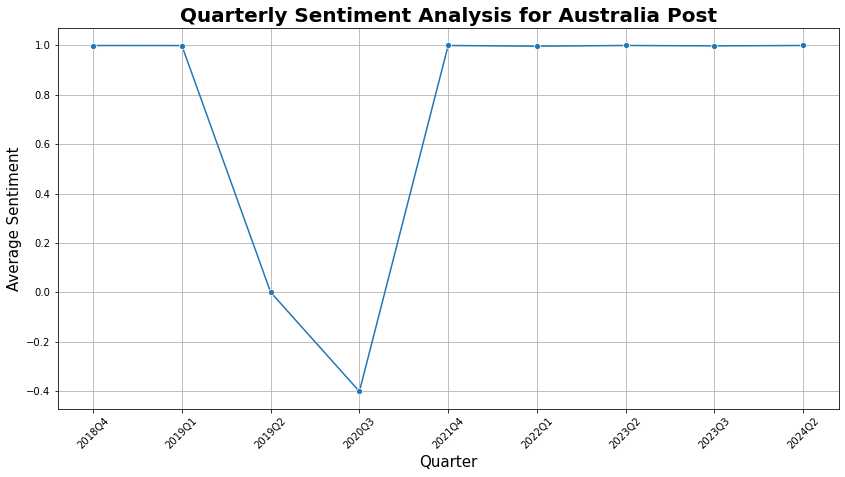

Topic #0:
service information text australia data using limited australian state sort
Topic #1:
function eu london var atlanta null jp length tokyo window
Topic #2:
core event base node function div script http mq au
Topic #3:
var size function null length point math return new push
Topic #4:
student course australia university make united best select want step

Frequency of GitHub Repositories on Australia Post by Year:
2018    1
2019    3
2020    1
2021    1
2022    1
2023    3
2024    1
Name: Year, dtype: int64

Frequency of GitHub Repositories on Australia Post by Quarter:
2018Q4    1
2019Q1    2
2019Q2    1
2020Q3    1
2021Q4    1
2022Q1    1
2023Q2    1
2023Q3    2
2024Q2    1
Name: Quarter, dtype: int64


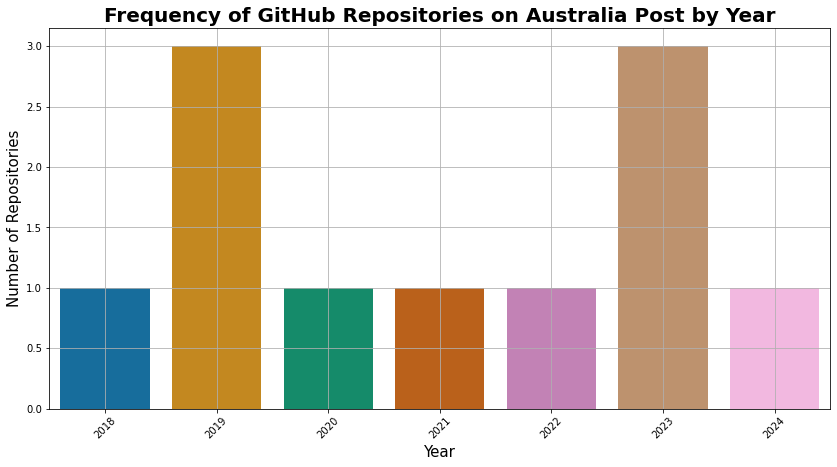

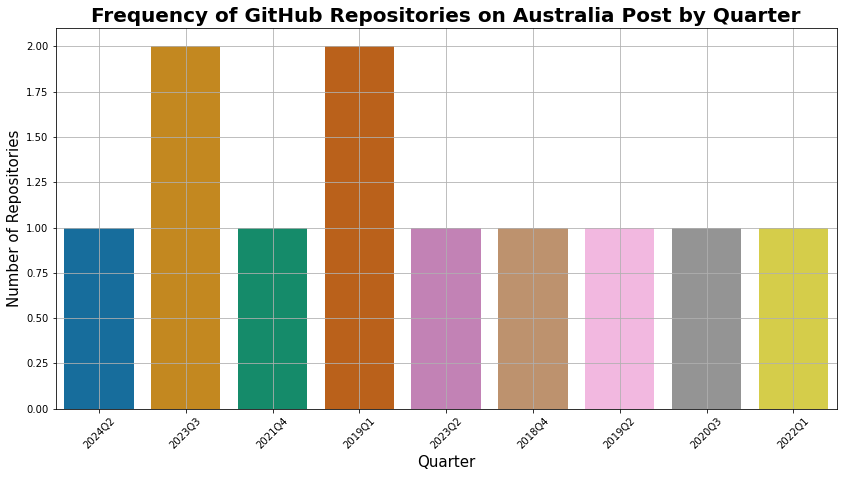

In [24]:
# GitHub Data Analysis

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    words = text.split()  # Tokenize text
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(words)

# Read the CSV file
github_data = pd.read_csv('/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_github_repos.csv')
print(f'github_data shape: {github_data.info()}\n')
print('The first 5 rows of the data are:')
print(github_data.head())

# Convert Date Columns to Datetime and handle timezone
github_data['Date Published'] = pd.to_datetime(github_data['Date Published'], utc=True)
github_data['Last Updated'] = pd.to_datetime(github_data['Last Updated'], utc=True)

# Remove timezone information
github_data['Date Published'] = github_data['Date Published'].dt.tz_convert(None)
github_data['Last Updated'] = github_data['Last Updated'].dt.tz_convert(None)

# Extract Year and Quarter for Analysis
github_data['Year'] = github_data['Last Updated'].dt.year
github_data['Quarter'] = github_data['Last Updated'].dt.to_period('Q').astype(str)

# Get the minimum and maximum years
min_year = github_data['Year'].min()
max_year = github_data['Year'].max()
print(f"Data ranges from {min_year} to {max_year}")

# Ensure directories exist
image_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/assets/images/github'
os.makedirs(image_dir, exist_ok=True)

analysis_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/analysis/github'
os.makedirs(analysis_dir, exist_ok=True)

# Filter data for "Australia Post" and "Australia post api"
aus_post_data = github_data[github_data['Service Name'].isin(['Australia Post', 'Australia post api'])]

# Apply preprocessing
aus_post_data['cleaned_description'] = aus_post_data['Description'].dropna().apply(preprocess_text)

# Perform Sentiment Analysis on Descriptions
analyzer = SentimentIntensityAnalyzer()
aus_post_data['Sentiment'] = aus_post_data['cleaned_description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Aggregate Sentiment by Quarter
quarterly_sentiment_aus_post = aus_post_data.groupby('Quarter')['Sentiment'].mean().reset_index()

# Plot Sentiment Trends for Australia Post
plt.figure(figsize=(14, 7))
sns.lineplot(x='Quarter', y='Sentiment', data=quarterly_sentiment_aus_post, marker='o', palette='colorblind')
plt.title('Quarterly Sentiment Analysis for Australia Post', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'quarterly_sentiment_aus_post.png'))
plt.show()

# Save Sentiment Data to CSV
quarterly_sentiment_aus_post.to_csv(os.path.join(analysis_dir, 'quarterly_sentiment_aus_post.csv'), index=False)

# Topic Modeling for Australia Post Comments
vectorizer = CountVectorizer(max_features=1000, max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(aus_post_data['cleaned_description'].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extract and print topics
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

# Save the top words of each topic to a CSV file
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
topics_df = pd.DataFrame(topics)
topics_df.to_csv(os.path.join(analysis_dir, 'topics_aus_post.csv'), index=False, header=False)

# Save the dataset with sentiment analysis
aus_post_data.to_csv(os.path.join(analysis_dir, 'aus_post_data_with_sentiment.csv'), index=False)

# Display Frequency Tables
frequency_by_year = aus_post_data['Year'].value_counts().sort_index()
frequency_by_quarter = aus_post_data['Quarter'].value_counts().sort_index()

# Save Frequency Tables to CSV
frequency_by_year.to_csv(os.path.join(analysis_dir, 'frequency_by_year_aus_post.csv'), header=['Frequency'])
frequency_by_quarter.to_csv(os.path.join(analysis_dir, 'frequency_by_quarter_aus_post.csv'), header=['Frequency'])

print("Frequency of GitHub Repositories on Australia Post by Year:")
print(frequency_by_year)
print("\nFrequency of GitHub Repositories on Australia Post by Quarter:")
print(frequency_by_quarter)

# Plot Frequency by Year
plt.figure(figsize=(14, 7))
sns.countplot(data=aus_post_data, x='Year', palette='colorblind')
plt.title('Frequency of GitHub Repositories on Australia Post by Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Repositories', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_year_aus_post.png'))
plt.show()

# Plot Frequency by Quarter
plt.figure(figsize=(14, 7))
sns.countplot(data=aus_post_data, x='Quarter', palette='colorblind')
plt.title('Frequency of GitHub Repositories on Australia Post by Quarter', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Number of Repositories', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_quarter_aus_post.png'))
plt.show()


[nltk_data] Downloading package stopwords to /Users/tnathu-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tnathu-
[nltk_data]     ai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Repository Name  82 non-null     object
 1   Description      82 non-null     object
 2   Tags             3 non-null      object
 3   URL              82 non-null     object
 4   Stars            82 non-null     int64 
 5   Forks            82 non-null     int64 
 6   Open Issues      82 non-null     int64 
 7   Language         33 non-null     object
 8   Date Published   82 non-null     object
 9   Last Updated     82 non-null     object
 10  Latest Release   82 non-null     object
 11  Service Name     82 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.8+ KB
github_data shape: None

The first 5 rows of the data are:
                       Repository Name  \
0         AustralianRainfallPrediction   
1               Road-Accident-Analysis   
2                        -Taxi-M

/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_83659/3571028791.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_post_data['cleaned_description'] = aus_post_data['Description'].dropna().apply(preprocess_text)
/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_83659/3571028791.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_post_data['Sentiment'] = aus_post_data['cleaned_description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])


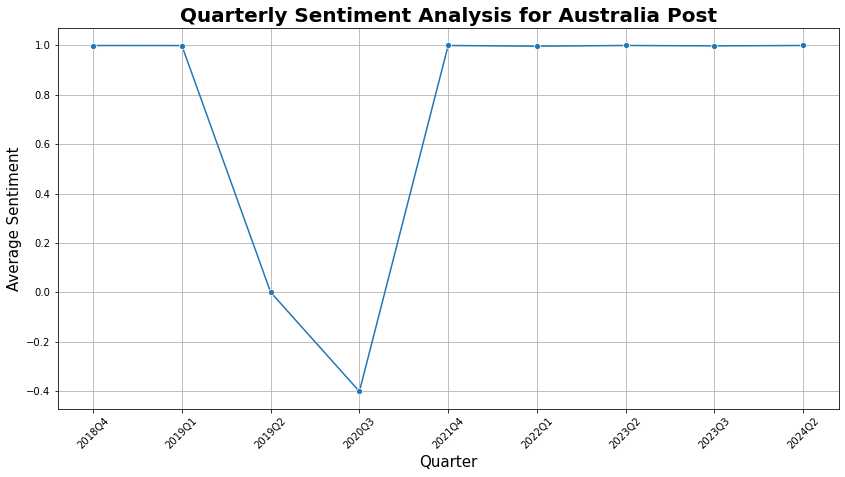

Topic #0:
service information text australia data using limited australian state sort
Topic #1:
function eu london var atlanta null jp length tokyo window
Topic #2:
core event base node function div script http mq au
Topic #3:
var size function null length point math return new push
Topic #4:
student course australia university make united best select want step

Frequency of GitHub Repositories on Australia Post by Year:
2018    1
2019    3
2020    1
2021    1
2022    1
2023    3
2024    1
Name: Year, dtype: int64

Frequency of GitHub Repositories on Australia Post by Quarter:
2018Q4    1
2019Q1    2
2019Q2    1
2020Q3    1
2021Q4    1
2022Q1    1
2023Q2    1
2023Q3    2
2024Q2    1
Name: Quarter, dtype: int64


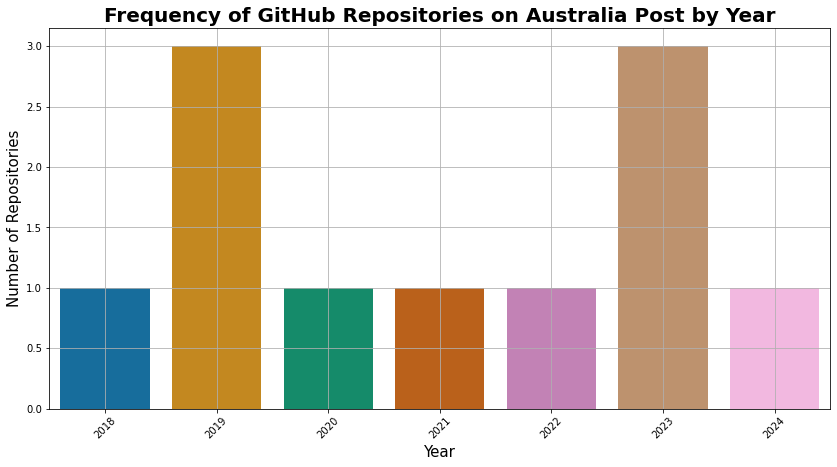

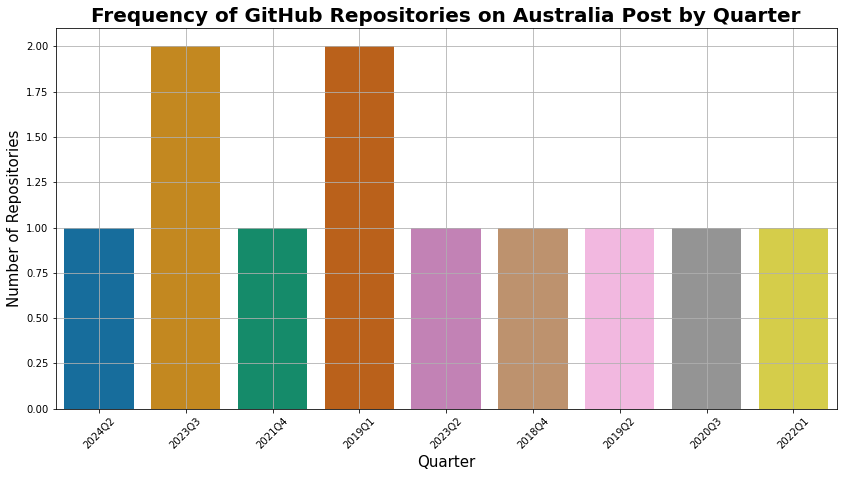

/var/folders/bt/7ws71xxn45bffcbhj7ddvm080000gn/T/ipykernel_83659/3571028791.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aus_post_data['description_length'] = aus_post_data['Description'].dropna().apply(len)


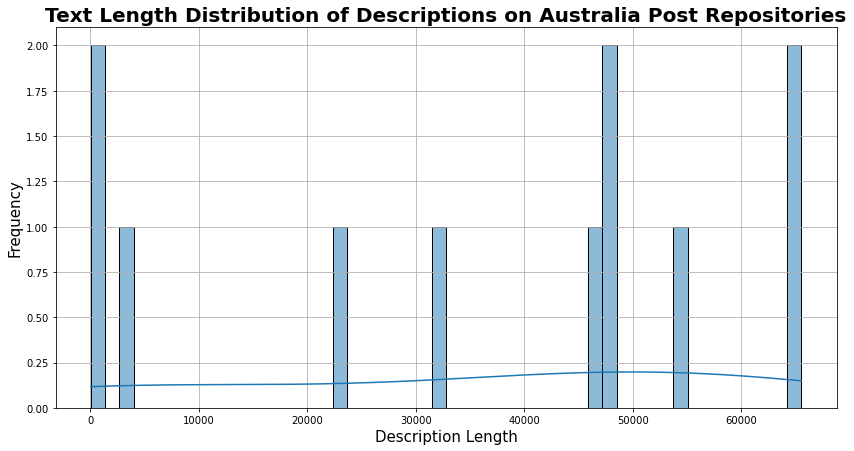

In [26]:
# GitHub Data Analysis

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ensure NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocess text
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    words = text.split()  # Tokenize text
    words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stopwords.words('english')]
    return ' '.join(words)

# Read the CSV file
github_data = pd.read_csv('/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/merged_github_repos.csv')
print(f'github_data shape: {github_data.info()}\n')
print('The first 5 rows of the data are:')
print(github_data.head())

# Convert Date Columns to Datetime and handle timezone
github_data['Date Published'] = pd.to_datetime(github_data['Date Published'], utc=True)
github_data['Last Updated'] = pd.to_datetime(github_data['Last Updated'], utc=True)

# Remove timezone information
github_data['Date Published'] = github_data['Date Published'].dt.tz_convert(None)
github_data['Last Updated'] = github_data['Last Updated'].dt.tz_convert(None)

# Extract Year and Quarter for Analysis
github_data['Year'] = github_data['Last Updated'].dt.year
github_data['Quarter'] = github_data['Last Updated'].dt.to_period('Q').astype(str)

# Get the minimum and maximum years
min_year = github_data['Year'].min()
max_year = github_data['Year'].max()
print(f"Data ranges from {min_year} to {max_year}")

# Ensure directories exist
image_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/assets/images/github'
os.makedirs(image_dir, exist_ok=True)

analysis_dir = '/Users/tnathu-ai/VSCode/Government-Digital-Transformation/data/intermediate/analysis/github'
os.makedirs(analysis_dir, exist_ok=True)

# Filter data for Australia Post
aus_post_data = github_data[github_data['Service Name'].isin(['Australia Post', 'Australia post api'])]

# Apply preprocessing
aus_post_data['cleaned_description'] = aus_post_data['Description'].dropna().apply(preprocess_text)

# Perform Sentiment Analysis on Descriptions
analyzer = SentimentIntensityAnalyzer()
aus_post_data['Sentiment'] = aus_post_data['cleaned_description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Aggregate Sentiment by Quarter
quarterly_sentiment_aus_post = aus_post_data.groupby('Quarter')['Sentiment'].mean().reset_index()

# Plot Sentiment Trends for Australia Post
plt.figure(figsize=(14, 7))
sns.lineplot(x='Quarter', y='Sentiment', data=quarterly_sentiment_aus_post, marker='o', palette='colorblind')
plt.title('Quarterly Sentiment Analysis for Australia Post', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Average Sentiment', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'quarterly_sentiment_aus_post.png'))
plt.show()

# Save Sentiment Data to CSV
quarterly_sentiment_aus_post.to_csv(os.path.join(analysis_dir, 'quarterly_sentiment_aus_post.csv'), index=False)

# Topic Modeling for Australia Post Comments
vectorizer = CountVectorizer(max_features=1000, max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(aus_post_data['cleaned_description'].dropna())
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Extract and print topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

n_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, n_top_words)

# Save the top words of each topic to a CSV file
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
topics_df = pd.DataFrame(topics)
topics_df.to_csv(os.path.join(analysis_dir, 'topics_aus_post.csv'), index=False, header=False)

# Save the dataset with sentiment analysis
aus_post_data.to_csv(os.path.join(analysis_dir, 'aus_post_data_with_sentiment.csv'), index=False)

# Display Frequency Tables
frequency_by_year = aus_post_data['Year'].value_counts().sort_index()
frequency_by_quarter = aus_post_data['Quarter'].value_counts().sort_index()

# Save Frequency Tables to CSV
frequency_by_year.to_csv(os.path.join(analysis_dir, 'frequency_by_year_aus_post.csv'), header=['Frequency'])
frequency_by_quarter.to_csv(os.path.join(analysis_dir, 'frequency_by_quarter_aus_post.csv'), header=['Frequency'])

print("Frequency of GitHub Repositories on Australia Post by Year:")
print(frequency_by_year)
print("\nFrequency of GitHub Repositories on Australia Post by Quarter:")
print(frequency_by_quarter)

# Plot Frequency by Year
plt.figure(figsize=(14, 7))
sns.countplot(data=aus_post_data, x='Year', palette='colorblind')
plt.title('Frequency of GitHub Repositories on Australia Post by Year', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Repositories', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_year_aus_post.png'))
plt.show()

# Plot Frequency by Quarter
plt.figure(figsize=(14, 7))
sns.countplot(data=aus_post_data, x='Quarter', palette='colorblind')
plt.title('Frequency of GitHub Repositories on Australia Post by Quarter', fontsize=20, fontweight='bold')
plt.xlabel('Quarter', fontsize=15)
plt.ylabel('Number of Repositories', fontsize=15)
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'frequency_by_quarter_aus_post.png'))
plt.show()

# Analyze text length distribution
aus_post_data['description_length'] = aus_post_data['Description'].dropna().apply(len)

# Plot text length distribution
plt.figure(figsize=(14, 7))
sns.histplot(aus_post_data['description_length'], bins=50, kde=True, palette='colorblind')
plt.title('Text Length Distribution of Descriptions on Australia Post Repositories', fontsize=20, fontweight='bold')
plt.xlabel('Description Length', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.savefig(os.path.join(image_dir, 'description_length_distribution_aus_post.png'))
plt.show()
